<a href="https://colab.research.google.com/github/anitamourya21/FellowshipAIChallenge/blob/main/IMDB_Movie_Review_NLP_Challenge_Anita_Mourya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Challenge: IMDB Sentiment Analysis

This Model uses IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

In [1]:
'''
1-Before starting here, we downloaded the dataset from kaggle and put it in the google drive under kaggle dir.
2-Mount the google drive to google colab
3-Import the python libraries to process the dataset
4-Read dataset csv from drive path "/content/drive/MyDrive/kaggle/IMDB Dataset.csv"
5-Preprocess the data
6-Write the model and train it
7-Apply the model on test data using machine learning techniques
8-Analyse the results

'''

'\n1-Before starting here, we downloaded the dataset from kaggle and put it in the google drive under kaggle dir.\n2-Mount the google drive to google colab\n3-Import the python libraries to process the dataset\n4-Read dataset csv from drive path "/content/drive/MyDrive/kaggle/IMDB Dataset.csv"\n5-Preprocess the data\n6-Write the model and train it\n7-Apply the model on test data using machine learning techniques\n8-Analyse the results\n\n'

In [2]:
# Mount the google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import basic python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn modules and libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Import nltk(Natural Language Toolkit) modules and libraries
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Import Beautiful Soup python library for parsing text mainly html markup
from bs4 import BeautifulSoup

# Import other required libaries
import re, string, unicodedata
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
# Read IMDB dataset from already downloaded csv in google drive
df = pd.read_csv("/content/drive/MyDrive/kaggle/IMDB Dataset.csv")
df2 = df

# Starting Exploratory Analysis of IMDB Dataset

In [7]:
# We analyze the dataset
df2.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df2.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [9]:
# Check the shape of the dataset
df2.shape

(50000, 2)

In [10]:
# Check the count of each sentiment in the dataset
df2.value_counts('sentiment')

sentiment
negative    25000
positive    25000
dtype: int64

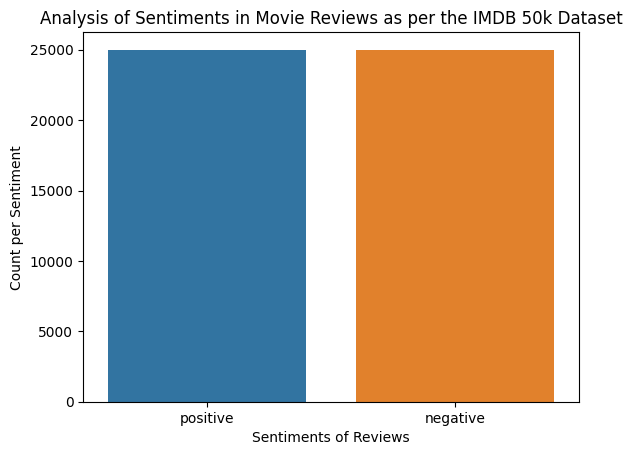

In [11]:
# Check distribution of sentiments - positive and negative reviews
sns.countplot(x=df['sentiment'], data=df)
plt.title('Analysis of Sentiments in Movie Reviews as per the IMDB 50k Dataset')
plt.ylabel("Count per Sentiment")
plt.xlabel("Sentiments of Reviews")
plt.savefig('sentiment.png')
plt.show()


From above, we can see that the dataset is balanced and have equal sentiments from user reviews. So, we can say it is an unbiased dataset.

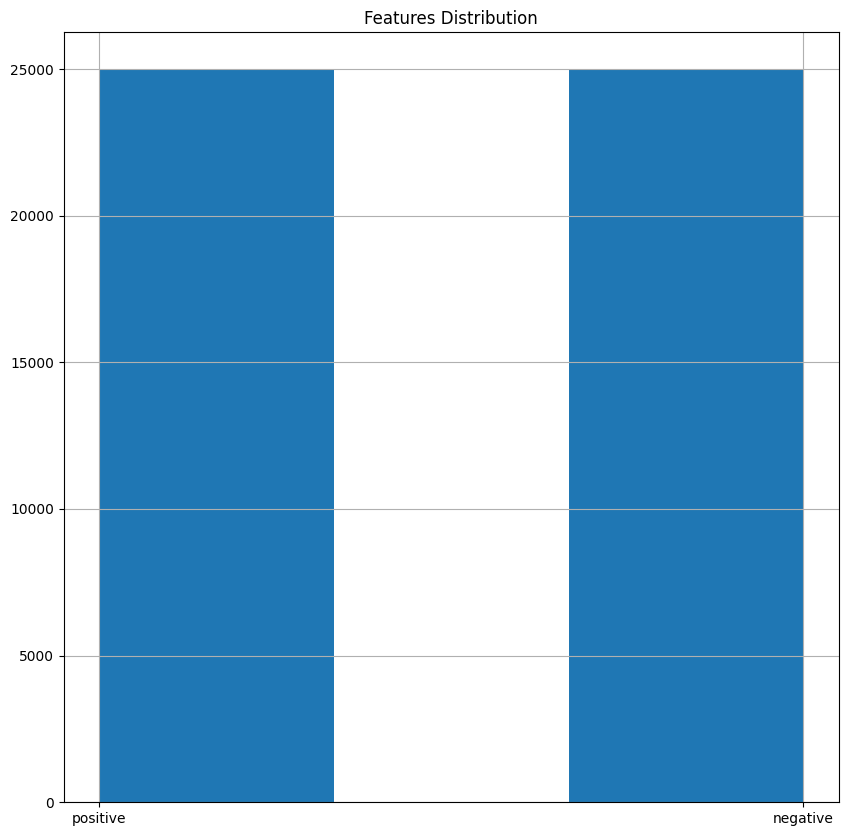

In [12]:
# Check the distribution of all the features.
# Here we have only one feature i.e. sentiment so plotting the different sentiments

df['sentiment'].hist(figsize=(10,10),bins = 3)
plt.title("Features Distribution")
plt.show()

We can see from above feature distribution that the data is continuous and not discrete.

# Start Preprocessing of Data

1. Cleaning up the stopwords from dataset and remove the html tags

In [13]:
'''
Preprocessing Pipeline to remove html tags, special characters, stopwords
'''

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)

    return text


#Define function for removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(sentence):
    ps=nltk.porter.PorterStemmer()
    sentence_words = nltk.word_tokenize(sentence)
    filtered_tokens= [ps.stem(word) for word in sentence_words]
    filtered_text= ' '.join(filtered_tokens)
    return filtered_text

# remove stop-words and punctuations
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    sentence = sentence.lower()
    tokens = sentence.split()
    filtered_tokens = [token.strip(string.punctuation) for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# remove stop-words and punctuations
def word_lemmetize(sentence):
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence_words = nltk.word_tokenize(sentence)

    filtered_tokens = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in sentence_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text




Apply preprocessing pipeline to the dataframe

In [14]:
# Apply the preproprocessing pipeline to the dataframe
df2['review']=df2['review'].apply(denoise_text) # strip the html and remove square brackets
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [15]:
# Remove special characters
df2['review']=df2['review'].apply(remove_special_characters)

In [ ]:
df2

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [20]:
# This is just for testing purpose, not using it for current study
#df3 = df2.head()
#df3['review'] = df3['review'].apply(simple_stemmer)
#df3



In [18]:
df2['review']=df2['review'].apply(remove_stopwords)
df2

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


In [21]:
df2['review']=df2['review'].apply(word_lemmetize)
df2

,review,sentiment
0,one reviewers mention watch 1 oz episode youll...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter matteis love time money visually stun f...,positive
...,...,...
49995,think movie right good job wasnt creative orig...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic teach parochial elementary school nun...,negative
49998,im go disagree previous comment side maltin on...,negative


In [22]:
# Segmentation of dataset into 80% training and 20% test set
train,test = train_test_split(df2,test_size =0.2,random_state=42)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

Transformed the text to numeric vectors which the machine can understand using bag of words (BOW) using in the form of Term frequency -Inverse Document Frequency (TF-IDF).

In [23]:
#transformation of the data into numeric vectors using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

In [39]:
# features = tfidf.get_feature_names_out()

# Lets check few words from vocabulary created by tfidf
print(str(tfidf.vocabulary_)[:1000])

{'thats': 157125, 'ask': 12783, 'fight': 57858, 'scream': 138189, 'match': 98199, 'swear': 153954, 'general': 64560, 'mayhem': 98679, 'permeate': 119616, '84': 3527, 'minutes': 102112, 'comparisons': 33759, 'stand': 149039, 'think': 158347, 'onedimensional': 113648, 'character': 28726, 'little': 92850, 'depth': 41807, 'virtually': 169875, 'impossible': 78909, 'care': 26473, 'happen': 70789, 'badly': 15194, 'write': 176680, 'cypher': 38821, 'director': 43798, 'hang': 70674, 'multicultural': 106265, 'beliefs': 17861, 'topic': 161369, 'better': 18729, 'dramas': 46726, 'tv': 164003, 'cinemai': 30808, 'confess': 34391, 'im': 78433, 'really': 129352, 'spot': 148514, 'bad': 15056, 'performances': 119398, 'film': 58004, 'say': 136785, 'nichola': 109092, 'burley': 24604, 'heroines': 73283, 'slutty': 145302, 'best': 18549, 'friend': 62205, 'wasim': 171389, 'zakir': 178598, 'nasty': 107690, 'bully': 24398, 'brother': 23587, 'absolutely': 4264, 'terrible': 156551, 'dont': 45865, 'know': 87848, 'ac

In [25]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,00000001,000001,0001,00015,001,0010,002,00383042,...,zzzz,zzzzip,zzzzz,zzzzzs,zzzzzzzz,zzzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
39087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Using support vector machines (SVC)to fit the trnsformed vector
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [27]:
svc.predict(tfidf.transform(test_x))


array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [28]:
print(svc.score(test_x_vector, test_y))

0.8947


In [29]:
conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])


In [30]:
class_names = df.columns
class_names

Index(['review', 'sentiment'], dtype='object')

In [32]:
conf_mat

array([[4569,  470],
       [ 583, 4378]])

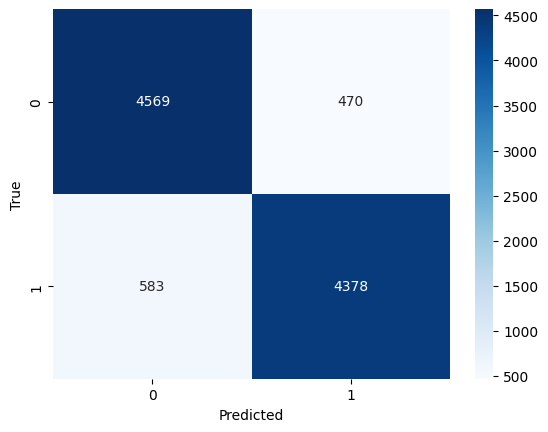

In [31]:
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
# Concatenate the dataframes
df_test = pd.concat([test_x, test_y], axis=1)
df_test.head()

,review,sentiment
33553,really like summerslam due look arena curtain ...,positive
9427,many television show appeal quite many differe...,positive
199,film quickly get major chase scene ever increa...,negative
12447,jane austen would definitely approve onegwynet...,positive
39489,expectations somewhat high go see movie think ...,negative


In [34]:
df_test.tail()

,review,sentiment
28567,although casper van dien michael rooker genera...,negative
25079,like movie wasnt really sure start watch enjoy...,positive
18707,yes nonsingaporeans cant see whats big deal fi...,positive
15200,far film go likable enough entertain character...,negative
5857,saw anatomy years ago dub friends house dont r...,positive


In [40]:
df_test['review'][39489]

'expectations somewhat high go see movie think steve carell could wrong come great movies like anchorman 40 yearold virgin little miss sunshine boy wrongill start right movie certain point steve carell allow steve carell handful moments film make laugh due almost entirely give wiggleroom thing hes undoubtedly talented individual shame sign turn opinion total trainwreckwith way ill discuss go horrifyingly wrongthe film begin dan burn widower three girls consider nationally syndicate advice column prepare girls family reunion extend relatives gather time otherthe family high atop list things make awful movie family behave like almost theyve transport pleasantville leave beaver caricature think family 7 reach point become obnoxious simply frustrate touch football crossword puzzle competitions family bowl talent show actual people behave almost sickeninganother big flaw woman carell suppose fall observe first scene steve carell like watch stroke victim try rehabilitate imagine suppose uniq

In [41]:
svc.predict(tfidf.transform([df_test['review'][39489]]))

array(['negative'], dtype=object)

In [44]:
# applying model on a sample testset test
print(df_test['review'][5857])
print(svc.predict(tfidf.transform([df_test['review'][5857]])))

saw anatomy years ago dub friends house dont remember much saw video store second one really relate first one franka ponte make little cameo one okay good first one im see first one tonight dub collectors edition really like german movies like one interest people cults like one movie could exist think dunno grossly entertain scary anatomy 2 little different character good first really think anatomy interest good see second one
['positive']


In [43]:
#Ploting the classification report
print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.89      0.91      0.90      5039
    negative       0.90      0.88      0.89      4961

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

